# 회귀분석(Regression Analysis) - 수치 예측


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#seaborn mpg Data Set
import seaborn as sns
DF = sns.load_dataset('mpg')

In [4]:
DF.info()
# 자동차 연비(mpg) 데이터
# mpg : miles per gallon
# 1 mile : 1.6km
# 1 gallon: 3.78liter

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
DF.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite


# 1. Simple Linear Regression
- First-Order Function

In [6]:
# 분석 변수 선택
DF1 = DF[['mpg', 'cylinders', 'displacement', 'weight']]
DF1.head(3)

,mpg,cylinders,displacement,weight
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436


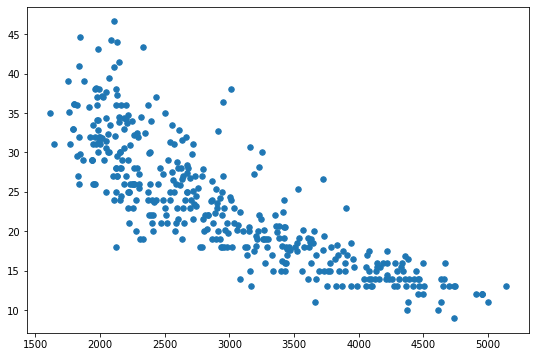

In [7]:
# 상관 관계 그래프 matplotlib 버전
import matplotlib.pyplot as plt

plt.figure(figsize = (9, 6))
plt.scatter(x = DF1.weight, y = DF1.mpg, s = 30)
plt.show()

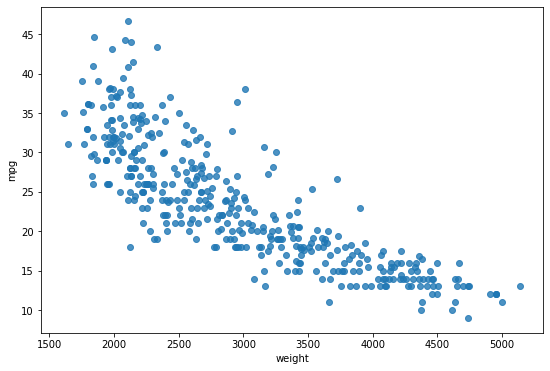

In [8]:
# 상관 관계 그래프 seaborn 버전
fig = plt.figure(figsize = (9, 6))
sns.regplot(x = 'weight', y = 'mpg', data = DF1, fit_reg = False)
plt.show()

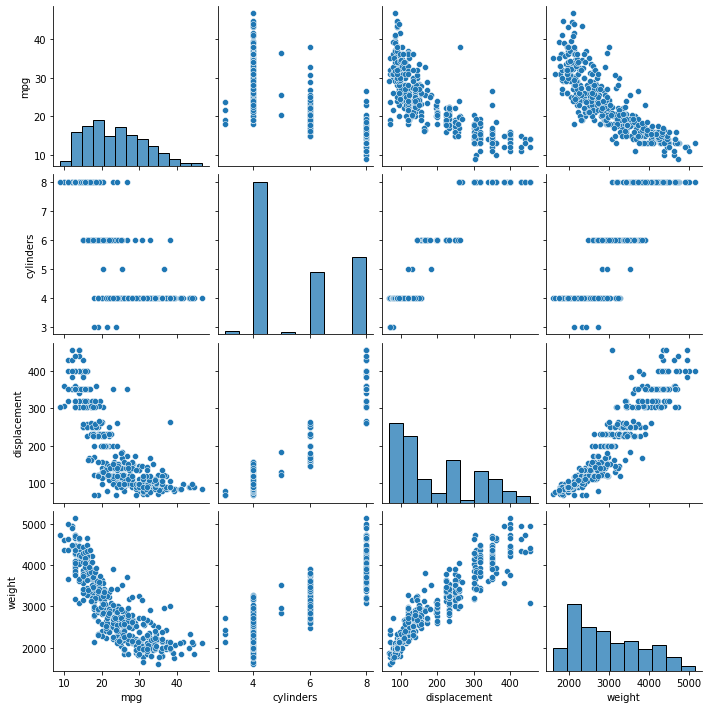

In [9]:
# pairplot
sns.pairplot(DF1)
plt.show()

In [11]:
# 상관 계수(Correlation Coefficient)
# - pearson's r
# - mpg vs weight

from scipy import stats
stats.pearsonr(DF1.mpg, DF1.weight)[0]

-0.831740933244335

In [13]:
# - mpg vs cylinders

from scipy import stats
stats.pearsonr(DF1.mpg, DF1.cylinders)[0]

-0.7753962854205542

In [14]:
# - mpg vs displacement

from scipy import stats
stats.pearsonr(DF1.mpg, DF1.displacement)[0]

-0.8042028248058978

In [17]:
# train_test_split()
#- 7:3
from sklearn.model_selection import train_test_split

X = DF1[['weight']]
y = DF1[['mpg']]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3 , random_state = 2045)

print('Train Data :', X_train.shape, Y_train.shape)
print('Test Data :', X_test.shape, Y_test.shape)


Train Data : (278, 1) (278, 1)
Test Data : (120, 1) (120, 1)


In [18]:
# 선형회귀 Modeling
# - 모델 생성
from sklearn.linear_model import LinearRegression

RA = LinearRegression()
RA.fit(X_train, Y_train)

LinearRegression()

In [20]:
# Weight 및 Bias
print('weight(w) :', RA.coef_)
print('bias(b) :', RA.intercept_)

weight(w) : [[-0.00766168]]
bias(b) : [46.28223639]


In [21]:
# 결정 계수(R-Sqaure) 1에 가까울수록 좋음
RA.score(X_test, Y_test)

0.7164499678296495

In [23]:
# 모델 평가
from sklearn.metrics import mean_squared_error
Y_hat = RA.predict(X_test)
mean_squared_error(Y_test, Y_hat)

17.01518447782976

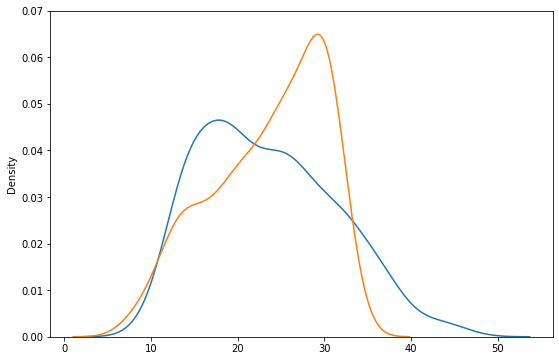

In [25]:
# 시각화
Y_hat1 = RA.predict(X)
plt.figure(figsize = (9, 6))
ax1 = sns.distplot(y, hist = False, label = 'y')
ax2 = sns.distplot(Y_hat1, hist = False, label = 'y_hat', ax = ax1)
plt.ylim(0, 0.07)
plt.show()

# 2. Linear Regression
- High-Order Function


In [26]:
# 분석 변수 선택
DF2 = DF[['mpg', 'cylinders','horsepower','weight']]

DF2.head(3)

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504
1,15.0,8,165.0,3693
2,18.0,8,150.0,3436


In [27]:
# train_test_split()
# - 7:3
from sklearn.model_selection import train_test_split

X = DF2[['weight']]
Y = DF2['mpg']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.3, random_state = 2045)

print('Train Data:', X_train.shape, Y_train.shape)
print('Test Data:', X_test.shape, Y_test.shape)

Train Data: (278, 1) (278,)
Test Data: (120, 1) (120,)


In [28]:
# 선형회귀 Modeling
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2, include_bias = False)
X_train_poly = poly.fit_transform(X_train)

print('변환 전 데이터: ', X_train.shape)
print('2차항 변환 데이터: ', X_train_poly.shape)

변환 전 데이터:  (278, 1)
2차항 변환 데이터:  (278, 2)


In [29]:
# High-Order 모델 생성
from sklearn.linear_model import LinearRegression

NL = LinearRegression()
NL.fit(X_train_poly, Y_train)

LinearRegression()

In [30]:
# Weight 및 Bias
import numpy as np
np.set_printoptions(suppress = True, precision = 10)

print('weight(w) : ', NL.coef_)
print('bias(b) : ', '%.8f' %NL.intercept_)

weight(w) :  [-0.0175042457  0.0000015338]
bias(b) :  60.88867527


In [31]:
# 결정계수(R-Square)
X_test_poly = poly.fit_transform(X_test)
NL.score(X_test_poly, Y_test)

0.7525521808321769

In [32]:
# 모델 평가
from sklearn.metrics import mean_squared_error
X_test_poly = poly.fit_transform(X_test)
mean_squared_error(Y_test, NL.predict(X_test_poly))

14.848773810921921

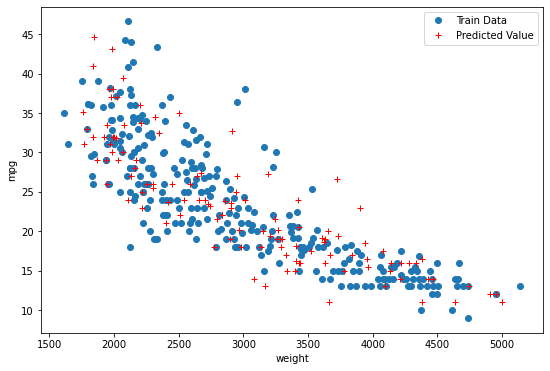

In [33]:
# 시각화
Y_hat_test = NL.predict(X_test_poly)

plt.figure(figsize = (9,6))
plt.plot(X_train, Y_train, 'o', label = 'Train Data')
plt.plot(X_test, Y_test, 'r+', label = 'Predicted Value')
plt.legend(loc = 'best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

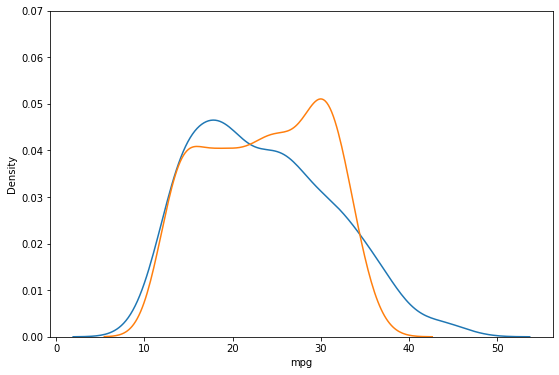

In [34]:
X_poly = poly.fit_transform(X)
Y_hat2 = NL.predict(X_poly)

plt.figure(figsize = (9, 6))
ax1 = sns.distplot(Y, hist=False, label='y')
ax2 = sns.distplot(Y_hat2, hist=False, label = 'Y_hat', ax = ax1)
plt.ylim(0, 0.07)
plt.show()

# 3. Multivariate Regression


In [35]:
DF3 = DF[['mpg','cylinders','displacement','weight']]
DF3.head(3)

,mpg,cylinders,displacement,weight
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436


In [36]:
# train_test_split()

from sklearn.model_selection import train_test_split

X = DF3[['displacement','weight']]
Y = DF3['mpg']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 2045)

print('Train Data:', X_train.shape, Y_train.shape)
print('Test Data:', X_test.shape, Y_test.shape)


Train Data: (278, 2) (278,)
Test Data: (120, 2) (120,)


In [37]:
# 모델 생성
from sklearn.linear_model import LinearRegression

MR = LinearRegression()
MR.fit(X_train, Y_train)

LinearRegression()

In [38]:
print('weight(w): ', MR.coef_)
print('bias(b): ', '%.8f' %MR.intercept_)

weight(w):  [-0.0176653275 -0.0056727314]
bias(b):  43.74652237


In [39]:
MR.score(X_test, Y_test)

0.720971246285159

In [40]:
# 모델 평가
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, MR.predict(X_test))

16.743872969214195

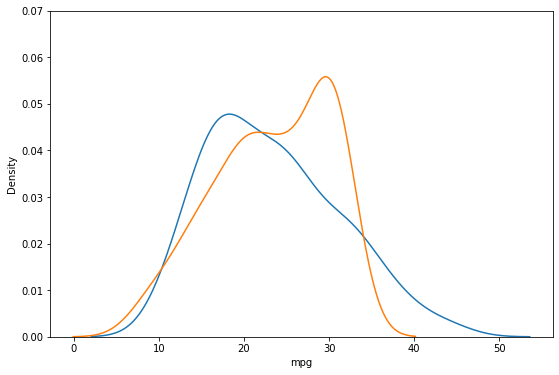

In [41]:
# ㅅ시각화
Y_hat3 = MR.predict(X_test)

plt.figure(figsize = (9,6))
ax1 = sns.distplot(Y_test, hist = False, label = 'Y_test')
ax2 = sns.distplot(Y_hat3, hist=False, label = 'Y_hat', ax = ax1)

plt.ylim(0,0.07)
plt.show()

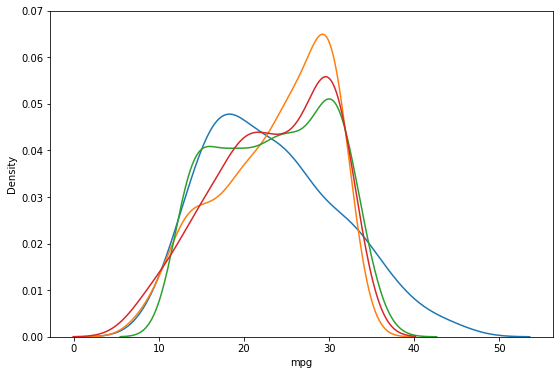

In [43]:
y_hat3 = MR.predict(X_test)
plt.figure(figsize = (9, 6))
ax1 = sns.distplot(Y_test, hist = False, label = 'y_test')
ax2 = sns.distplot(Y_hat1, hist = False, label='y_hat', ax = ax1)
ax3 = sns.distplot(Y_hat2, hist = False, label='y_hat', ax = ax1)
ax4 = sns.distplot(Y_hat3, hist = False, label='y_hat', ax = ax1)
plt.ylim(0, 0.07)
plt.show()